In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np

In [2]:
# Door 1
door1 = pd.read_csv("data/data_door1.txt",  sep=";", header=None)
door1 = door1.set_axis(["Timestamp", "x", "y", "z", "pressure"], axis=1, inplace=False)

# Door 2
door2 = pd.read_csv("data/data_door2.txt",  sep=";", header=None)
# has 5 variables ???

# Test Data (where is from ??)
testdata = pd.read_csv("data/testdata.csv", sep=";", header=None)
testdata = testdata.set_axis(["Timestamp", "x", "y", "z", "pressure"], axis=1, inplace=False)

In [3]:
door1.head()

,Timestamp,x,y,z,pressure
0,2975,-14.460515,0.517131,0.095765,83.465385
1,3015,-12.028084,0.421366,0.076612,83.465782
2,3055,-10.840598,0.344754,0.134071,83.465599
3,3095,-10.227702,0.344754,0.153224,83.465515
4,3134,-9.902101,0.325601,0.114918,83.465507


______________________________________________________________________________________________________________

In [9]:
# Start selecting one variable and segmenting
# DOOR 1 : X

variable = list(door1.x)
print("length: ", len(variable))

length:  6057868


In [93]:
def calculateMedian(variable, size):        
    start = max(i - size, 0) 
    end = min(i, len(variable)) 

    calculate_median = variable[start:end]
    calculate_median.sort()
    if(len(calculate_median) > 0): median = calculate_median[len(calculate_median)//2]
    else: median = variable[i]
        
    return median


### MEDIAN values #####

storedValues = list()
medianValues = list()
size = 100

#### CUSUM values #####

drift = 0.07
threshold = 0.01

s = list([0])
gMax = list([0])
gMin = list([0])
alarms = list()

### STEP Detection ####
alarmDetected = False
alarmInterval = 50    # Alarms closer than this will be considerated consecutive
alarmIntervalCounter = 0
alarmCounter = 0
change = list()


for i in range(0, 20000):
    
    ### MEDIAN calculation #####
    
    storedValues.append(variable[i])
    median = calculateMedian(storedValues, size)
    variableMedian.append(median)
    

   ###### CUSUM intervals #####
        
    if(i != 0):
        s_i = variableMedian[i] - variableMedian[i-1]
        gMax_i = max(gMax[i-1] + s_i - drift, 0)
        gMin_i = max(gMin[i-1] - s_i - drift, 0)

        if(gMax_i > threshold or gMin_i > threshold):
            alarms.append(i)
            gMax_t = 0
            gMin_t = 0
            alarmDetected = True
            #print("Alarm detected")
            
        else: 
            #print("---")
            alarmDetected = False

        s.append(s_i)
        gMax.append(gMax_i)
        gMin.append(gMax_i)
        
    
    #### Step Detection #####
    
    if(alarmDetected):            
        alarmCounter += 1
    
    else:
        alarmCounter = 0
        
    change.append(alarmCounter)

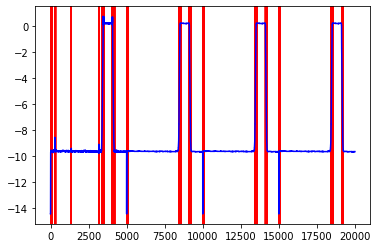

In [94]:
# Alarms detected with median
for i in alarms:
    plt.axvline(x=i, color='red', linestyle='-')
plt.plot(variableMedian[0:20000], color="blue")


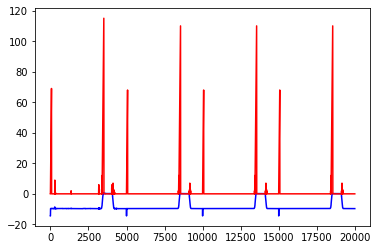

In [95]:
plt.plot(variableMedian[0:20000], color="blue")
plt.plot(change, color="red")

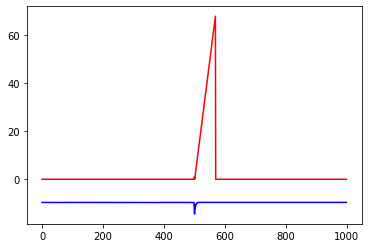

In [92]:
plt.plot(variableMedian[4500:5500], color="blue")
plt.plot(change[4500:5500], color="red")

In [96]:
filterSize = 50
for i in range(0, 5000):
    start = max(0, i-filterSize)
    end = i
    

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 306,
 326,
 1358,
 1359,
 1364,
 3167,
 3168,
 3169,
 3170,
 3171,
 3173,
 3174,
 3175,
 3176,
 3177,
 3178,
 3181,
 3182,
 3183,
 3184,
 3188,
 3189,
 3190,
 3192,
 3193,
 3194,
 3199,
 3200,
 3366,
 3367,
 3368,
 3376,
 3377,
 3380,
 3382,
 3383,
 3384,
 3385,
 3386,
 3387,
 3388,
 3389,
 3390,
 3391,
 3392,
 3393,
 3395,
 3396,
 3397,
 3398,
 3399,
 3400,
 3401,
 3402,
 3403,
 3404,
 3405,
 3406,
 3407,
 3408,
 3409,
 3410,
 3411,
 3412,
 3413,
 3414,
 3415,
 3416,
 3417,
 3418,
 3419,
 3420,
 3421,
 3422,
 3423,
 3424,
 3425,
 3426,
 3427,
 3428,
 3429,
 3430,
 3431,
 3432,
 3433,
 3434,
 3435,
 3